### Titanic Dataset EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
702,0,3,female,18.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
490,0,3,male,NaN,1,0,19.9667,S,Third,man,True,NaN,Southampton,no,False
738,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
142,1,3,female,24.0,1,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


## Step - 1 Labeling
#### Numerical  - Age, fare
#### Categorical - survived, pclass, sex, embarked, class, who, adult_male, emnark_town, alive, alone, deck, sibsp, parch, 
#### Mix - 0

## Step - 2 Univariate Analysis

### Distribution Analysis : shape, Central tendancy (Mean, Mode, Median), Dispersion.
### Identifying Potencial Issues : Outliers, skewness, missing values

#### Steps for Univariate Analysis

1) Descriptive Statistics : df.discribe()
2) Visualizations
3) Identifying Outliers
4) Skewnesss
5) Conclusion


## Numerical Data 
1) column.describe()
2) column.plot(kind='hist', bins=30)
3) column.plot(kind='bar')
4) column.plot(kind='kde') 
5) column.skew()
6) column.plot(kind='box') 

## Categorical Data 
1) column.value_counts()
2) column.value_counts().plot(kind='bar')
3) column.value_counts().plot(kind='pie',autopct='%0.1f%%)


# Age

### Conclusion
- Age is Almost Normally Distributed
- 20% of values are missing
- There are some outliers

In [5]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

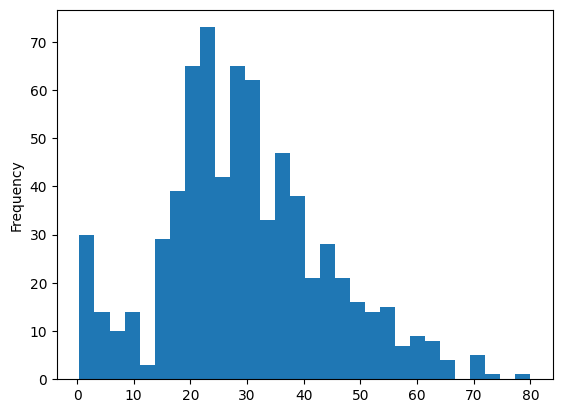

In [6]:
df['age'].plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

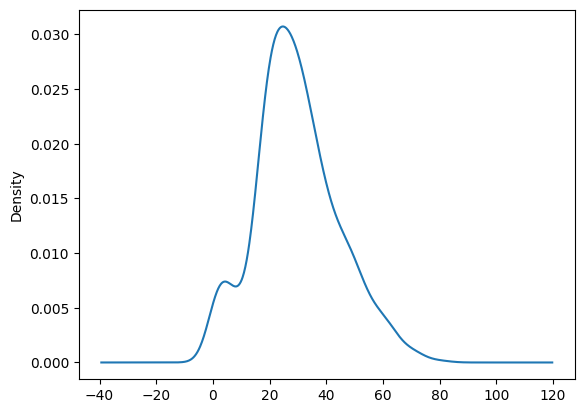

In [7]:
df['age'].plot(kind='kde')

In [8]:
df['age'].skew() # near 0 is normal distribution, greater is positive Skewnesss

np.float64(0.38910778230082704)

<Axes: >

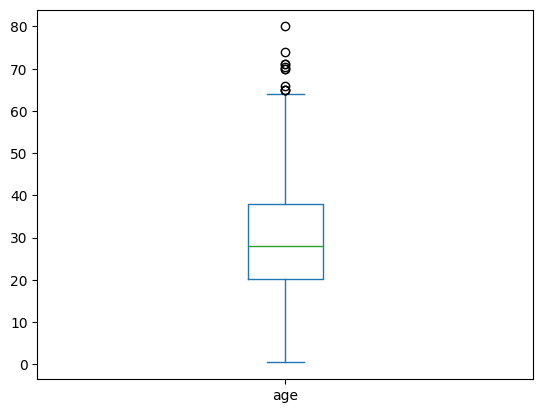

In [9]:
df['age'].plot(kind='box')

In [10]:
df[df['age']>65]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df['age'].isnull().sum()/len(df['age'])

np.float64(0.19865319865319866)

# Fare
- the Data is highly positively Skewed
- Fare column actually contains the group fare and not the individual fare (this might be an issue)
- We need to create a new column called individual fare
### Conclusion

In [12]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

<Axes: ylabel='Frequency'>

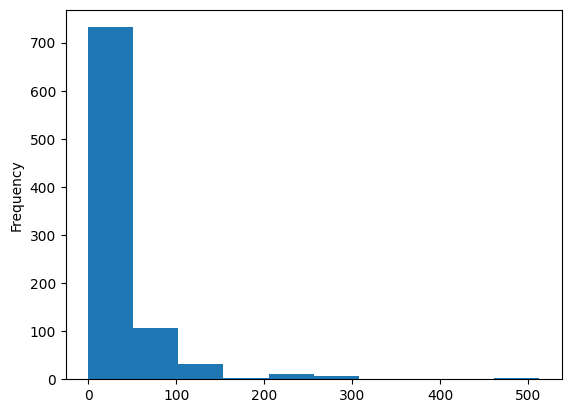

In [13]:
df['fare'].plot(kind='hist')

<Axes: ylabel='Density'>

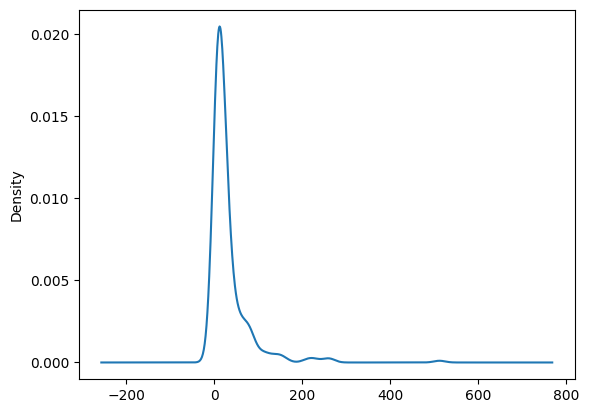

In [14]:
df['fare'].plot(kind='kde')

In [15]:
df['fare'].skew()

np.float64(4.787316519674893)

<Axes: >

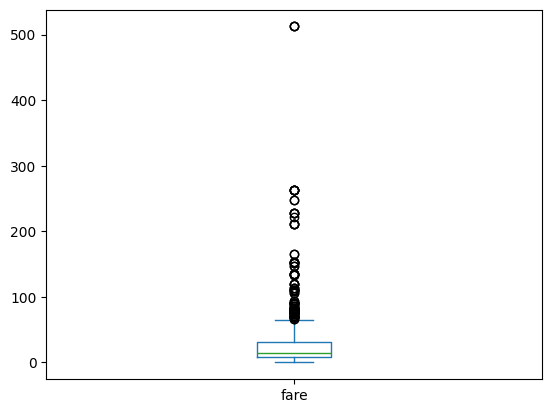

In [16]:
df['fare'].plot(kind='box')

In [17]:
df[df['fare']>250]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False


In [18]:
df['fare'].isnull().sum()

np.int64(0)

## Categorical Data Univariat Analysis

### Survived

Conclusion

In [20]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived'>

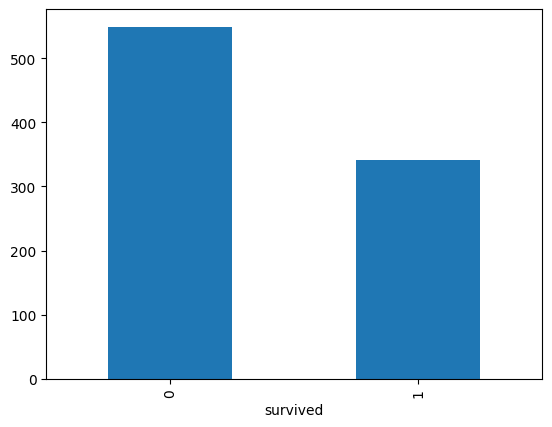

In [21]:
df['survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

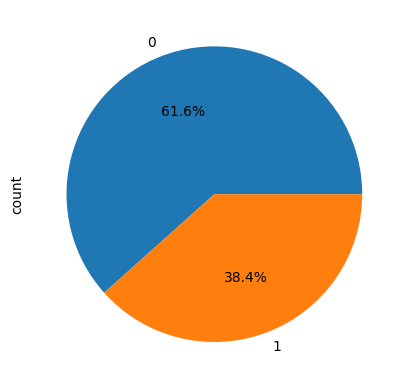

In [23]:
df['survived'].value_counts().plot(kind='pie', autopct='%0.1f%%')

## Step - 3 Bivariant Analysis

- Select 2 columns
- Understand Reletionship
    #### 1) Numerical - Numerical
            a) Scatterplot, Regression Plot, 2D Histplot, 2D KDEplots
            b) check correlation coefficient to check Linear Relation

    #### 2) Numerical - Categorical
            a) barplot, boxplot, kdeplot, violinplot, SOMETIME (scatterplot)
           
    #### 2) Categorical - Categorical
            a) cross-tabulations or contingency tables 
            b) heatmap, stacked barplots, treemaps

In [28]:
pd.crosstab(df['survived'],df['pclass'],normalize='columns')*100

pclass,1,2,3
survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='pclass', ylabel='survived'>

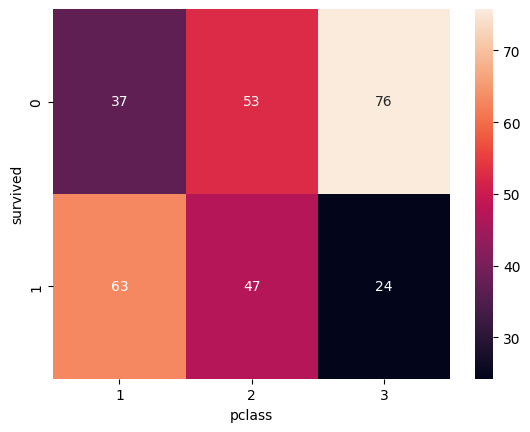

In [30]:
sns.heatmap(pd.crosstab(df['survived'],df['pclass'],normalize='columns')*100, annot=True)

In [31]:
pd.crosstab(df['survived'],df['sex'],normalize='columns')*100

sex,female,male
survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [32]:
pd.crosstab(df['survived'],df['embarked'],normalize='columns')*100

embarked,C,Q,S
survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [33]:
pd.crosstab(df['pclass'],df['embarked'],normalize='columns')*100

embarked,C,Q,S
pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


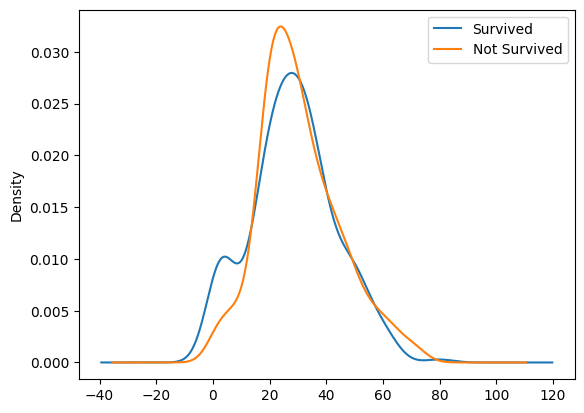

In [41]:
import matplotlib.pyplot as plt
df[df['survived']==1]['age'].plot(kind='kde',label='Survived')
df[df['survived']==0]['age'].plot(kind='kde',label='Not Survived')
plt.legend()
plt.show()